## Retention rates for 2011-2012

In [343]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [344]:
df = pd.read_csv('education_inequality_data.csv')

df.head()

,id,school_name,state,school_type,grade_level,funding_per_student_usd,avg_test_score_percent,student_teacher_ratio,percent_low_income,percent_minority,internet_access_percent,dropout_rate_percent
0,1,Bowman High School,Michigan,Private,High,9575.80,65.9,17.5,30.0,44.0,74.1,3.44
1,2,Foster High School,Michigan,Charter,Middle,16733.10,87.3,24.2,93.5,40.1,79.9,8.67
2,3,Henson High School,New York,Public,Middle,24890.74,72.8,27.0,58.1,35.8,51.1,14.75
3,4,Weaver High School,Texas,Private,Elementary,6857.49,81.5,26.2,82.7,72.0,55.5,13.45
4,5,King Elementary School,Michigan,Public,Elementary,16910.73,44.7,20.2,41.4,16.1,57.8,6.98


In [345]:
df.columns

Index(['id', 'school_name', 'state', 'school_type', 'grade_level',
       'funding_per_student_usd', 'avg_test_score_percent',
       'student_teacher_ratio', 'percent_low_income', 'percent_minority',
       'internet_access_percent', 'dropout_rate_percent'],
      dtype='object')

In [346]:
df.describe()

,id,funding_per_student_usd,avg_test_score_percent,student_teacher_ratio,percent_low_income,percent_minority,internet_access_percent,dropout_rate_percent
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,15154.160180,70.001000,19.733200,53.756400,49.652000,74.688500,7.765600
std,288.819436,5931.384208,17.703408,5.823201,24.021689,25.241025,14.433086,4.214452
min,1.000000,5012.970000,40.000000,10.000000,10.200000,5.000000,50.000000,0.500000
25%,250.750000,9726.040000,54.575000,14.800000,33.400000,29.300000,62.400000,4.050000
50%,500.500000,15362.465000,69.900000,19.400000,54.100000,49.450000,74.750000,7.685000
75%,750.250000,20280.007500,85.625000,25.000000,74.600000,69.950000,87.325000,11.492500
max,1000.000000,24981.900000,100.000000,30.000000,94.900000,94.900000,100.000000,14.990000


In [347]:
df.isna().sum()

id                         0
school_name                0
state                      0
school_type                0
grade_level                0
funding_per_student_usd    0
avg_test_score_percent     0
student_teacher_ratio      0
percent_low_income         0
percent_minority           0
internet_access_percent    0
dropout_rate_percent       0
dtype: int64

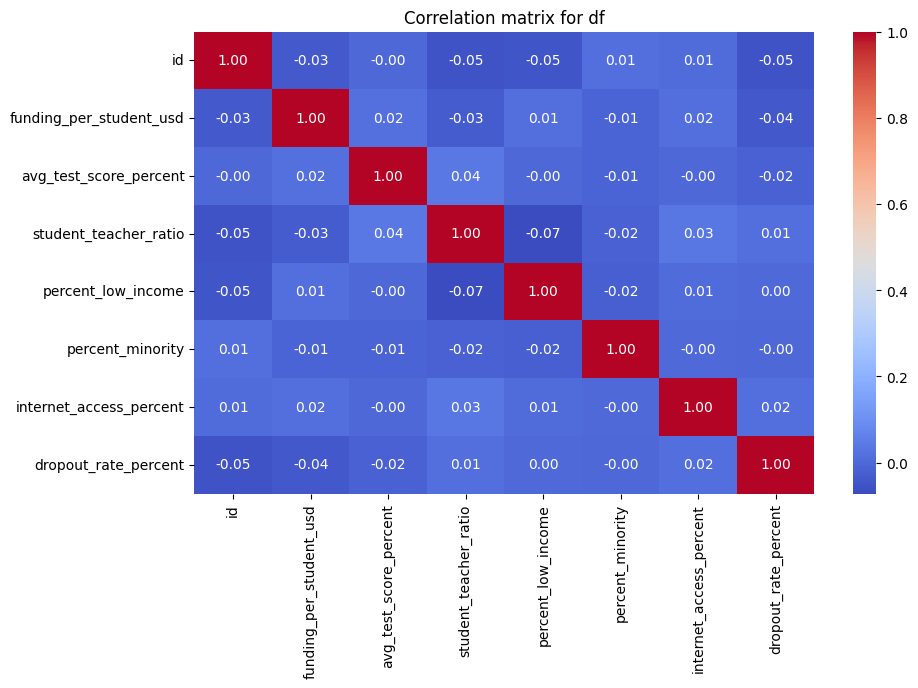

In [348]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for df")
plt.show()

In [349]:
df['avg_test_score_percent']

0      65.9
1      87.3
2      72.8
3      81.5
4      44.7
       ... 
995    51.9
996    61.1
997    94.2
998    57.0
999    51.6
Name: avg_test_score_percent, Length: 1000, dtype: float64

## Clean up data

In [350]:

df = df.drop(columns=['school_name', 'state', 'id'])


# Keep only rows where 'ColumnName' is NOT equal to 'Value'
df = df[df['grade_level'] != 'High']


In [351]:
from sklearn.preprocessing import OneHotEncoder

df = pd.get_dummies(df, columns=['school_type', 'grade_level'], drop_first=True)


In [352]:
df.head()

,funding_per_student_usd,avg_test_score_percent,student_teacher_ratio,percent_low_income,percent_minority,internet_access_percent,dropout_rate_percent,school_type_Private,school_type_Public,grade_level_Middle
1,16733.10,87.3,24.2,93.5,40.1,79.9,8.67,False,False,True
2,24890.74,72.8,27.0,58.1,35.8,51.1,14.75,False,True,True
3,6857.49,81.5,26.2,82.7,72.0,55.5,13.45,True,False,False
4,16910.73,44.7,20.2,41.4,16.1,57.8,6.98,False,True,False
5,14930.51,46.3,26.8,64.5,12.6,70.1,11.95,True,False,False


## Z-Score Normalization

In [353]:
df['funding_per_student_usd'] = scaler.fit_transform(df[['funding_per_student_usd']]) 
df['avg_test_score_percent'] = scaler.fit_transform(df[['avg_test_score_percent']]) 
df['student_teacher_ratio'] = scaler.fit_transform(df[['student_teacher_ratio']]) 
df['percent_low_income'] = scaler.fit_transform(df[['percent_low_income']]) 
df['percent_minority'] = scaler.fit_transform(df[['percent_minority']]) 
df['internet_access_percent'] = scaler.fit_transform(df[['internet_access_percent']]) 
df['dropout_rate_percent'] = scaler.fit_transform(df[['dropout_rate_percent']]) 

In [354]:
df.head()

,funding_per_student_usd,avg_test_score_percent,student_teacher_ratio,percent_low_income,percent_minority,internet_access_percent,dropout_rate_percent,school_type_Private,school_type_Public,grade_level_Middle
1,0.265139,0.975512,0.775400,1.644441,-0.365632,0.393106,0.193679,False,False,True
2,1.624051,0.160229,1.254960,0.161612,-0.537306,-1.619198,1.630679,False,True,True
3,-1.379955,0.649399,1.117943,1.192053,0.907944,-1.311762,1.323425,True,False,False
4,0.294728,-1.419735,0.090314,-0.537915,-1.323809,-1.151058,-0.205750,False,True,False
5,-0.035140,-1.329773,1.220706,0.429694,-1.463543,-0.291636,0.968902,True,False,False


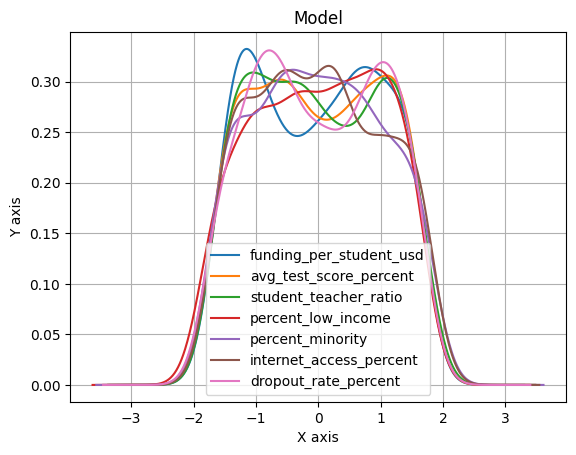

In [355]:

df.plot(kind='density')
plt.title('Model')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)

plt.show()

In [356]:
X = df.drop(columns=['funding_per_student_usd'], axis=1)
y = df['funding_per_student_usd']

In [357]:
X.columns

Index(['avg_test_score_percent', 'student_teacher_ratio', 'percent_low_income',
       'percent_minority', 'internet_access_percent', 'dropout_rate_percent',
       'school_type_Private', 'school_type_Public', 'grade_level_Middle'],
      dtype='object')

In [358]:
print(f"X Shape {X.shape}")
print(f"y Shape {y.shape}")

X Shape (670, 9)
y Shape (670,)


## Linear regression

In [359]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import root_mean_squared_error, r2_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


rmse = root_mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)


print('Model Evaluation Metrics:')
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

# # Inverse transform the scaled data to get back the original
# data_reverted = scaler.inverse_transform(data_scaled)
# print(f"Reverted data:\n{data_reverted}")


Model Evaluation Metrics:
RMSE: 1.03
R2 Score: -0.04


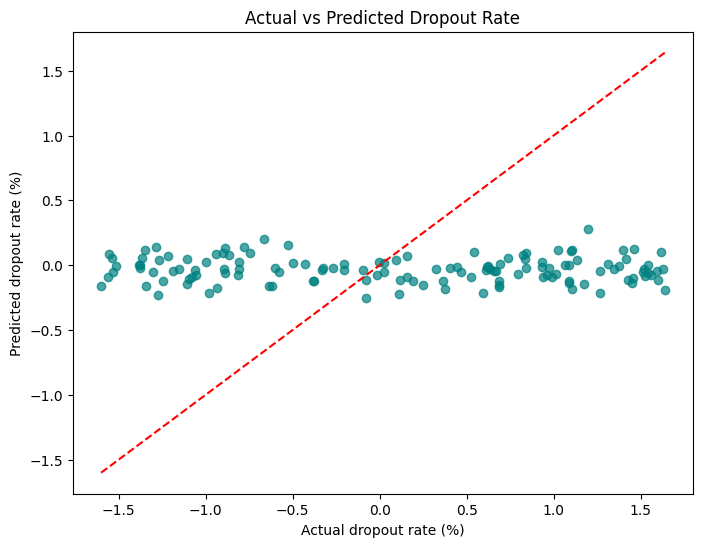

In [360]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual dropout rate (%)')
plt.ylabel('Predicted dropout rate (%)')
plt.title('Actual vs Predicted Dropout Rate')
plt.show()

Explore the relationship between funding and academic outcomes


- To analyze this i need to segment funding low, med, high
- Also segment scores A, B, C, D, F
- 


